# Métodos hierárquicos de agrupamento

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Passo a Passo

1. Selecione as variáveis quantitativas da base de pinguins e elimine valores faltantes


In [2]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

3. Padronize as variáveis para média zero e desvio padrão 1

In [3]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos

In [4]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

5. Faça o Dendrograma

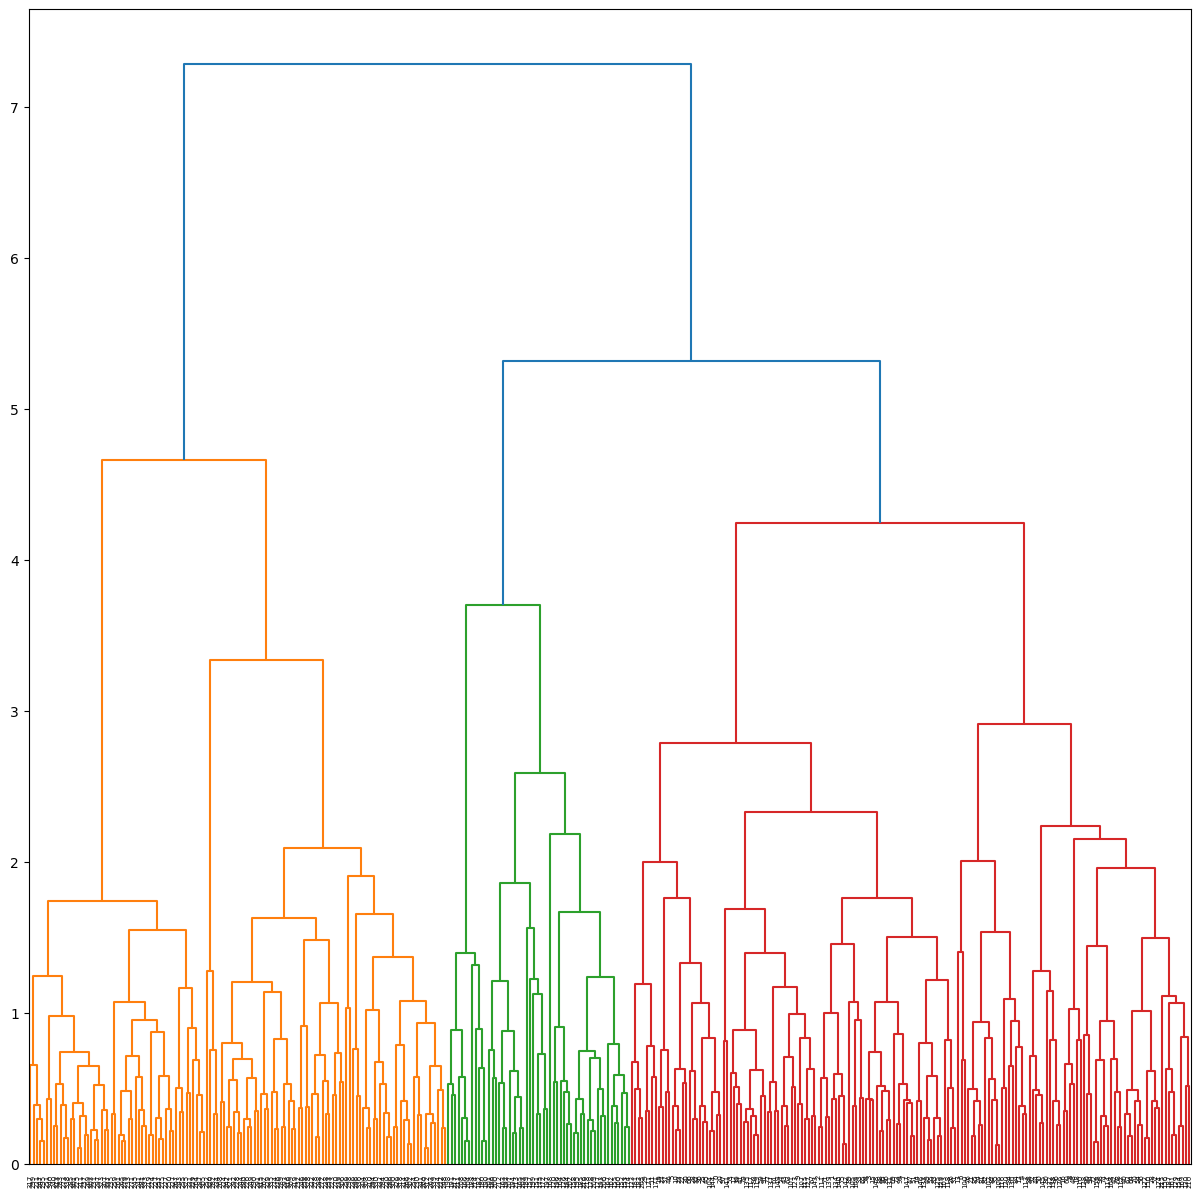

In [5]:
plt.figure(figsize=(15, 15))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalição os grupos

- Quantos pinguins de cada espécie há em cada grupo?


In [6]:
peng_num['clus'] = clus.labels_
peng_num.clus.value_counts()

1    165
0    123
2     54
Name: clus, dtype: int64

In [7]:
peng = peng.merge(peng_num['clus'], how='left', on='id')

# A relação de penguins por espécie presentes em cada grupo
pd.crosstab(peng['species'], peng['clus'])

clus,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


- Descreva as variáveis quantitativas de cada grupo.

In [8]:
peng.groupby('clus').mean()

C:\Users\Artur\AppData\Local\Temp\ipykernel_12392\1571737040.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  peng.groupby('clus').mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
clus,,,,
0.0,47.504878,14.982114,217.186992,5076.016260
1.0,39.283030,18.304242,190.048485,3688.181818
2.0,49.935185,18.568519,197.055556,3779.629630


In [9]:
peng.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,clus
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.798246
std,5.459584,1.974793,14.061714,801.954536,0.691547
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


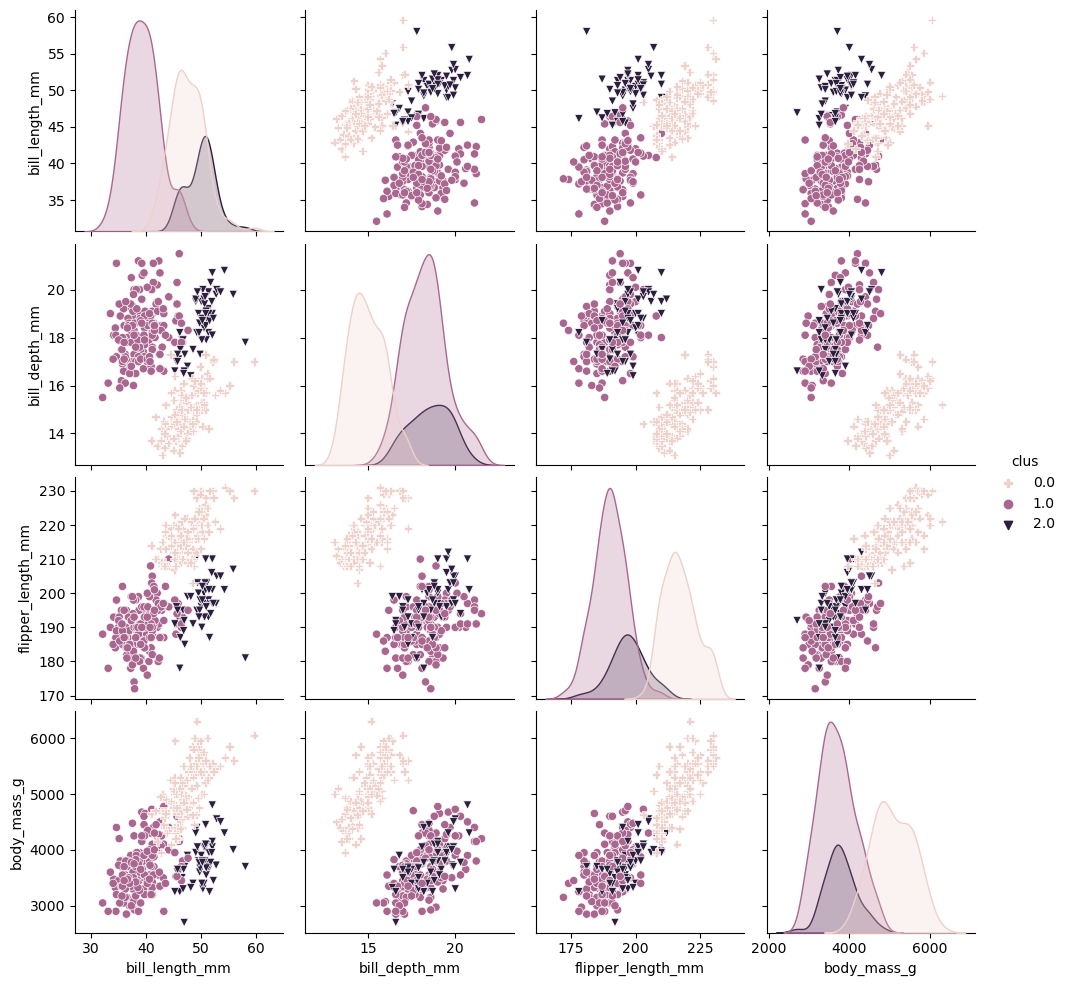

In [10]:
# Visualização com base no grupo_3
sns.pairplot(data=peng, hue='clus', markers=['P', 'o', 'v'])

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. 

- Faça o agrupamento hierárquico semelhante ao anterior, com 6 grupos.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [11]:
# Realizando agrupamento com 6 clusters
clus_6 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)

# Treinando o algoritmo
clus_6.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [12]:
peng_num['clus_6'] = clus_6.labels_
peng = peng.merge(peng_num['clus_6'], how='left', on='id')

# A relação de penguins por espécie presentes em cada grupo
pd.crosstab(peng['species'], peng['clus_6'])

clus_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [13]:
peng.groupby('clus_6').mean()

C:\Users\Artur\AppData\Local\Temp\ipykernel_12392\2348306525.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  peng.groupby('clus_6').mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,clus
clus_6,,,,,
0.0,49.192958,15.625352,220.985915,5407.042254,0.0
1.0,37.956250,17.657292,187.031250,3411.718750,1.0
2.0,41.128986,19.204348,194.246377,4072.826087,1.0
3.0,45.200000,14.103846,212.000000,4624.038462,0.0
4.0,49.452381,18.207143,194.476190,3654.761905,2.0
5.0,51.625000,19.833333,206.083333,4216.666667,2.0


In [16]:
# Relação de pinguins por espécie e sexo em cada grupo
pd.crosstab([peng['species'], peng['sex']], peng['clus_6'])

clus_6            0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [20]:
peng.groupby(['clus_6', 'sex']).mean()

C:\Users\Artur\AppData\Local\Temp\ipykernel_12392\4095307516.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  peng.groupby(['clus_6', 'sex']).mean()


bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
clus_6 sex                                                                     
0.0    Female       47.811111      14.988889         217.666667  4938.888889   
       Male         49.473770      15.718033         221.540984  5484.836066   
1.0    Female       37.618919      17.477027         187.621622  3338.175676   
       Male         39.600000      18.355556         185.166667  3725.000000   
2.0    Female       43.092308      18.692308         192.307692  3742.307692   
       Male         40.649091      19.307273         194.781818  4147.727273   
3.0    Female       45.151020      14.100000         211.795918  4632.142857   
4.0    Female       47.965000      17.405000         192.200000  3508.750000   
       Male         50.804545      18.936364         196.545455  3787.500000   
5.0    Male         51.625000      19.833333         206.083333  4216.666667   

               clus  
clus_6 sex           
0.0    Female   0.0  
       Male     0.0  
1.0    Female   1.0  
       Male     1.0  
2.0    Female   1.0  
       Male     1.0  
3.0    Female   0.0  
4.0    Female   2.0  
       Male     2.0  
5.0    Male     2.0

C:\Users\Artur\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Artur\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Artur\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Artur\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
C:\Users\Artur\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: 
The markers list has fewe

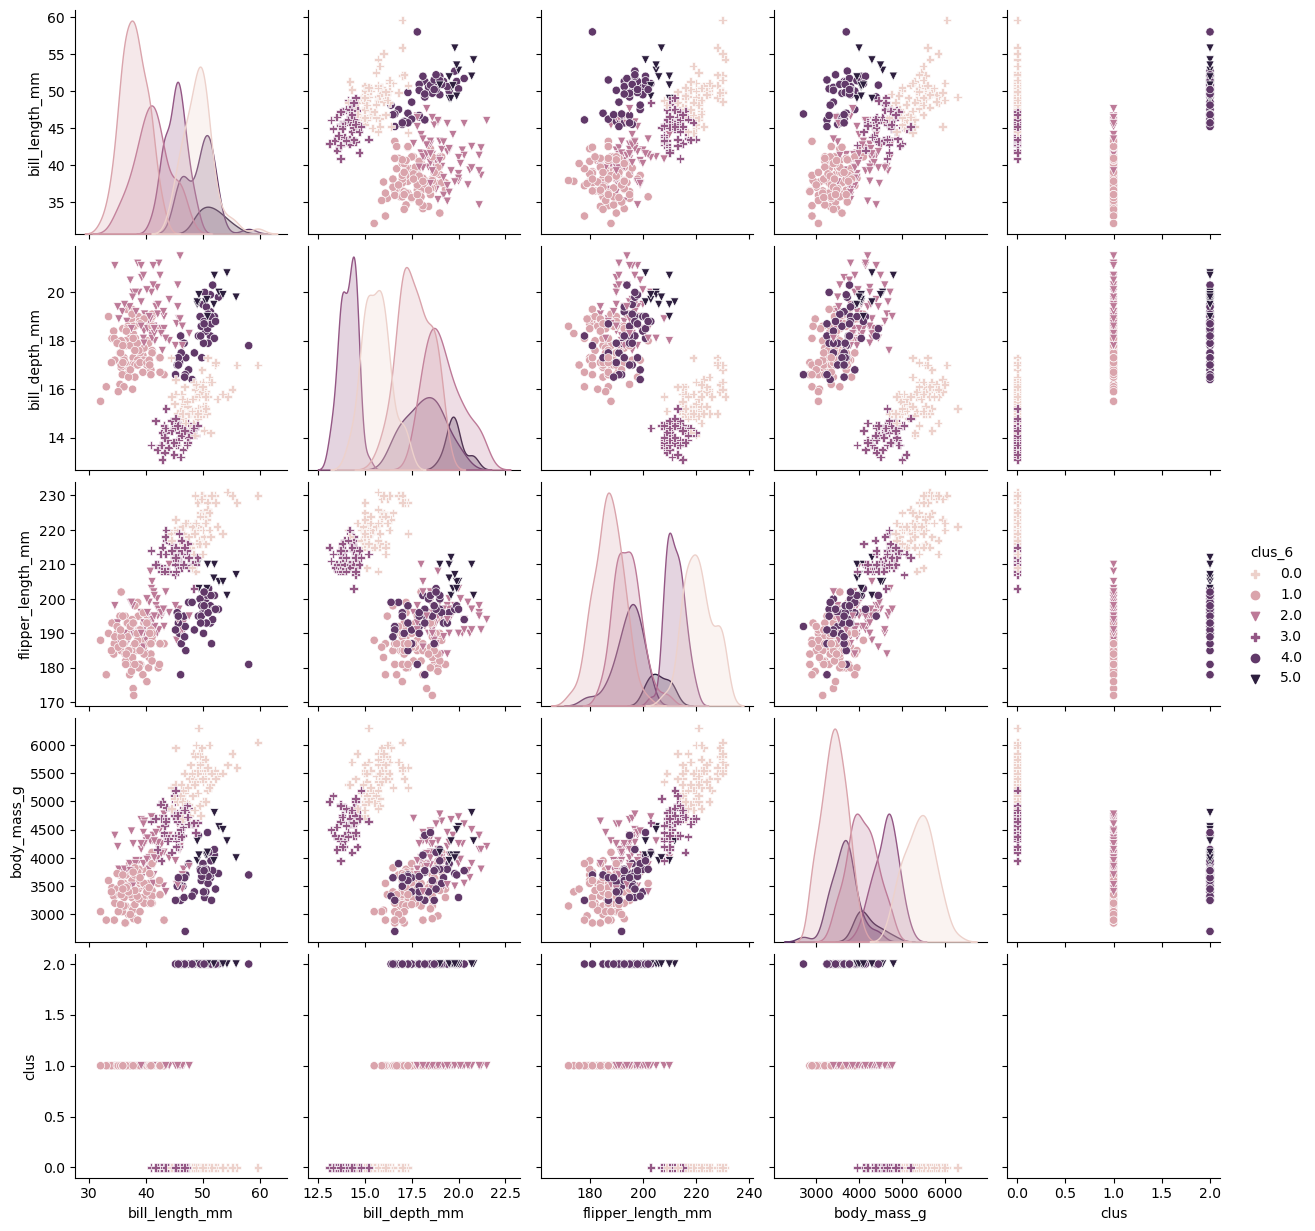

In [14]:
# Visualização com base no grupo_3
sns.pairplot(data=peng, hue='clus_6', markers=['P', 'o', 'v'])